### train 1k , test 1k SVM
- 28 X 28 인 2차원 데이터를 1차원 데이터로 늘어놓은 것이다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('../Data/train_20k.csv',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('../Data/test_1k.csv',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# 첫번 째 칼럼의 빈도수 (train 정답의 숫자 빈도 확인)
train[0].value_counts().sort_index()

0    1994
1    2281
2    1929
3    2076
4    1945
5    1776
6    1971
7    2093
8    1922
9    2014
Name: 0, dtype: int64

In [6]:
# train data의 내용 보기
import numpy as np

In [7]:
temp = np.array(train.loc[0, train.columns.difference([0])])
temp.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
# 잘 안보이니가 조금 줄여서 하자.
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0 # 줄 수 세기 위해서

for i in range(0,29): # 행
    if i % 2 == 1:
        for j in range(0,29):
            if j % 2 == 1:
                tempColumns.append(temp1[i,j])
                count += 1

count

196

In [9]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


### 학습 시켜서 예측해보기 (누가 썼는지 맞추기 0 - 9)

In [10]:
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:,train.columns.difference([0])]

test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:,test.columns.difference([0])]

In [11]:
# 학습하기
from sklearn.svm import SVC

In [12]:
clf = SVC()

clf.fit(train_data,train_label)

clf.score(test_data,test_label)

0.9630369630369631

---
### 시각화 하기

In [13]:
import matplotlib.pyplot as plt

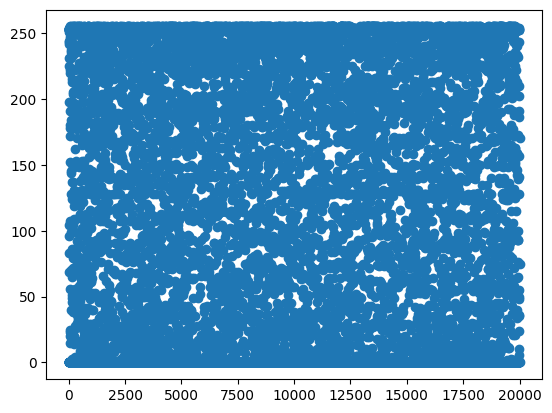

In [14]:
plt.scatter(
    train_data.index,
    train_data[300]
)

plt.show()

### 로그 변환
- 큰값을 작은 값으로 표시하기 위해서 사용한다. <br><br>
- 데이터를 줄이겠다는 말이다. <br><br>

### 로그에 관하여
- 기본적으로 log안의 x 값은 양수만 가능하다. <br><br>
- 0에 가까운 값을 log를 취하게 되면 음의 무한대 값에 가까워진다. <br><br>
- 너무 작은 값의 경우에 프로그램 계산에 -inf가 나온다. <br><br>
- 이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖는다. <br><br>

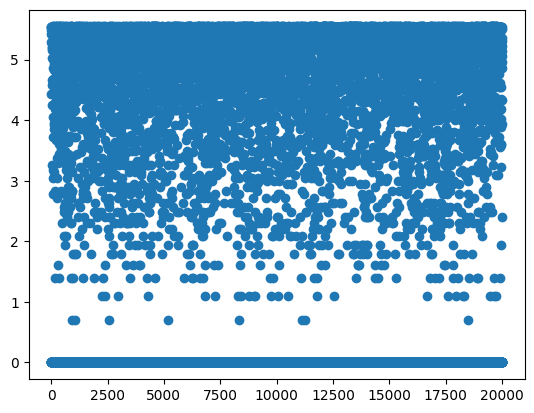

In [20]:
plt.scatter(
    train_data.index,
    np.log1p(train_data[300])
)

plt.show()

In [16]:
# data의 표준화
train = pd.DataFrame(np.log1p(train_data))
test = pd.DataFrame(np.log1p(test_data))

In [17]:
clf = SVC()

clf.fit(train,train_label)

clf.score(test,test_label)

0.965034965034965

In [18]:
train.iloc[:,400:450]
train_data.iloc[5:10,400:450]

,401,402,403,404,405,406,407,408,409,410,...,441,442,443,444,445,446,447,448,449,450
5,0,0,10,53,179,253,253,255,253,253,...,6,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,253,252,252,108,0,...,0,0,0,0,0,0,0,0,0,0
7,45,222,252,252,252,252,253,252,252,252,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,178,254,162,0,0,...,0,0,0,0,0,0,0,0,0,0
9,96,253,255,253,200,122,7,25,201,250,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train.iloc[5:10,400:450]

,401,402,403,404,405,406,407,408,409,410,...,441,442,443,444,445,446,447,448,449,450
5,0.000000,0.000000,2.397895,3.988984,5.192957,5.537334,5.537334,5.545177,5.537334,5.537334,...,1.94591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,5.537334,5.533389,5.533389,4.691348,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.828641,5.407172,5.533389,5.533389,5.533389,5.533389,5.537334,5.533389,5.533389,5.533389,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,5.187386,5.541264,5.093750,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.574711,5.537334,5.545177,5.537334,5.303305,4.812184,2.079442,3.258097,5.308268,5.525453,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
